In [2]:
!pip install pandas scikit-learn seaborn matplotlib


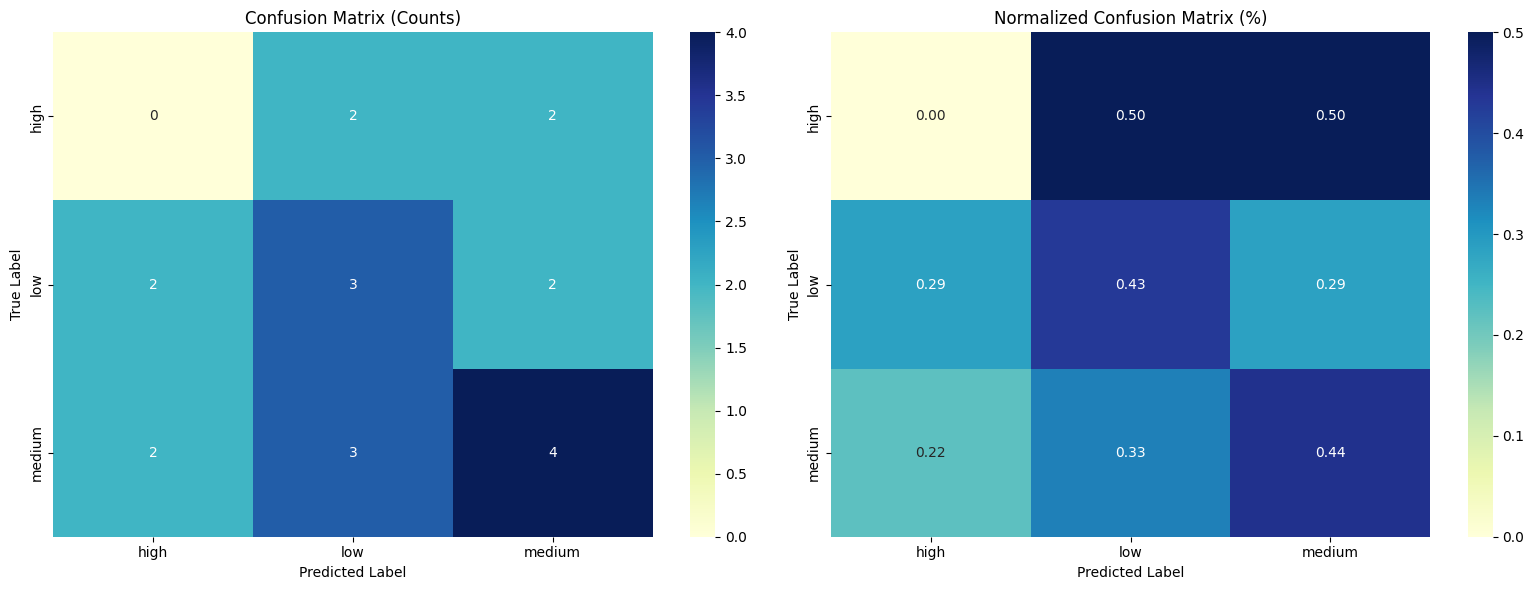

=== Classification Report ===
              precision    recall  f1-score   support

        high       0.00      0.00      0.00         4
         low       0.38      0.43      0.40         7
      medium       0.50      0.44      0.47         9

    accuracy                           0.35        20
   macro avg       0.29      0.29      0.29        20
weighted avg       0.36      0.35      0.35        20

Accuracy: 0.35
Precision (weighted): 0.36
Recall (weighted): 0.35


In [6]:
# Step 1: Import all necessary libraries
import pandas as pd   # For handling data tables
import numpy as np    # For math operations
import seaborn as sns # For drawing nice heatmaps
import matplotlib.pyplot as plt  # For plotting graphs

# Machine learning libraries
from sklearn.model_selection import train_test_split  # To split data into train and test
from sklearn.preprocessing import LabelEncoder        # To convert words into numbers
from sklearn.ensemble import RandomForestClassifier    # Random Forest model for classification
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report  # For evaluation

# Step 2: Load the dataset (your traffic congestion data)
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/traffic_congestion.csv")

# Step 3: Encode categorical text columns into numbers
# 'time_of_day' (like "morning", "evening") is converted into numbers
data['time_of_day_encoded'] = LabelEncoder().fit_transform(data['time_of_day'])

# 'congestion_level' (like "High", "Medium", "Low") is also converted into numbers
label_encoder = LabelEncoder()
data['congestion_level_encoded'] = label_encoder.fit_transform(data['congestion_level'])

# Step 4: Separate the features (X) and the target (y)
# X = things we use to predict (input features)
# y = thing we are trying to predict (output label)
X = data[['sensor_count', 'avg_speed', 'time_of_day_encoded']]
y = data['congestion_level_encoded']

# Step 5: Split the data into training set and testing set
# Training set = used to teach the model
# Testing set = used to check if the model learned correctly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Create and train the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)  # 100 decision trees
model.fit(X_train, y_train)  # Teach the model using training data

# Step 7: Use the trained model to make predictions on test data
y_pred = model.predict(X_test)

# Step 8: Create the confusion matrix (to check how good the model predicted)
cm = confusion_matrix(y_test, y_pred)

# Step 9: Normalize the confusion matrix (to show percentages instead of counts)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Step 10: Plot both confusion matrices side-by-side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns of plots

# Plot 1: Regular confusion matrix (count of predictions)
sns.heatmap(cm, annot=True, cmap='YlGnBu', fmt='d',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_, ax=axes[0])
axes[0].set_title("Confusion Matrix (Counts)")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")

# Plot 2: Normalized confusion matrix (percentage of predictions)
sns.heatmap(cm_normalized, annot=True, cmap='YlGnBu', fmt='.2f',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_, ax=axes[1])
axes[1].set_title("Normalized Confusion Matrix (%)")
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("True Label")

# Adjust layout so plots don’t overlap
plt.tight_layout()
plt.show()

# Step 11: Calculate evaluation metrics
# These numbers tell how good the model is overall
accuracy = accuracy_score(y_test, y_pred)  # Correct predictions out of all predictions
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)  # How accurate the model is when it predicts a label
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)  # How well the model finds all correct labels

# Step 12: Print a detailed report and metrics
print("=== Classification Report ===")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_, zero_division=0))

# Print the important scores
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision (weighted): {precision:.2f}")
print(f"Recall (weighted): {recall:.2f}")
